In [1]:
!pip install keras_ocr tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 636.7 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 KB 10.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 8.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1

In [31]:
!pip install kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 KB 617.3 kB/s eta 0:00:00a 0:00:01


In [40]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("hammadjavaid/6992-labeled-meme-images-dataset")

In [41]:
dataset_path = dataset_path+"/images/images"
dataset_path

'/root/.cache/kagglehub/datasets/hammadjavaid/6992-labeled-meme-images-dataset/versions/1/images/images'

In [14]:
image_path="https://i.chzbgr.com/thumb800/37828613/hD4420B59/parking-lot-only-open-on-week-days-and-one-meme-including-me-i-wonder-why-my-back-hurts-also-me"

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step


<Axes: >

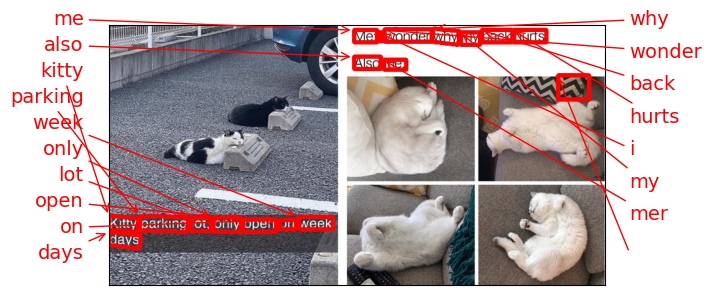

In [15]:
import matplotlib.pyplot as plt
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

img = keras_ocr.tools.read(image_path)

prediction_groups = pipeline.recognize([img])

keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [16]:
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
#example of a line mask for the word "Tuesday"
box = prediction_groups[0][10]
x0, y0 = box[1][0]
x1, y1 = box[1][1] 
x2, y2 = box[1][2]
x3, y3 = box[1][3] 
        
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [19]:
import cv2

In [20]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

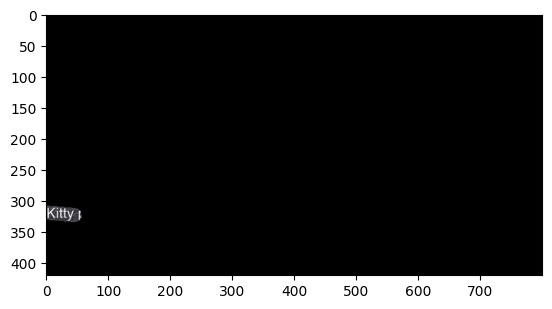

In [22]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

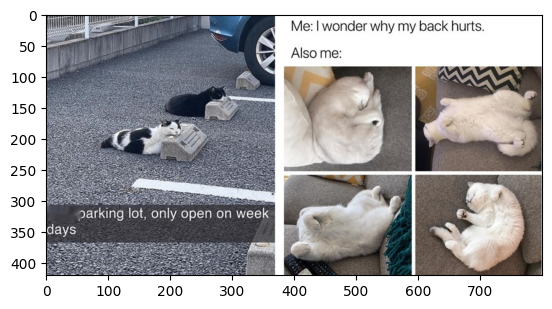

In [23]:
img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

In [24]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    img = keras_ocr.tools.read(img_path)
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [35]:
import os

In [51]:
for filename in tqdm(image_files, desc="Processing Images", unit="image"):
    try:
        file_path = os.path.join(dataset_path, filename)
        inpainted_image = inpaint_text(file_path, pipeline)
        inpainted_image_bgr = cv2.cvtColor(inpainted_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f"./prepared_images/{filename}", inpainted_image_bgr)
        clear_output(wait=True)
    except:
        pass

Processing Images: 100%|██████████| 6989/6989 [7:19:18<00:00,  3.77s/image]


In [44]:
from IPython.display import clear_output

In [48]:
import os
import cv2
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Запускаем параллельную обработку
def inpaint_and_save(file_path, output_path, pipeline):
    inpainted_image = inpaint_text(file_path, pipeline)
    filename = os.path.basename(file_path)
    cv2.imwrite(f"{output_path}/{filename}", inpainted_image)

output_path = "./prepared_images"

# Создаем директорию для выходных изображений, если её нет
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Получаем список файлов изображений
image_files = [filename for filename in os.listdir(dataset_path)
               if os.path.isfile(os.path.join(dataset_path, filename)) and filename.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Используем ThreadPoolExecutor для распараллеливания процесса
with ThreadPoolExecutor(max_workers=3) as executor:
    # Добавляем прогресс-бар с помощью tqdm
    for _ in tqdm(executor.map(lambda file_path: inpaint_and_save(file_path, output_path, pipeline),
                               [os.path.join(dataset_path, file) for file in image_files]),
                  total=len(image_files), desc="Processing Images", unit="image"):
        clear_output(wait=True)


Processing Images:   0%|          | 0/6989 [00:00<?, ?image/s]

1/1 [==============================] - 5s 5s/step


Processing Images:   0%|          | 0/6989 [00:05<?, ?image/s]

1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 0s 228ms/step


KeyboardInterrupt: 